In [1]:
import pandas as pd
import seaborn as sns

df = sns.load_dataset("titanic")
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [2]:
X = df[["class", "sex", "embark_town", "fare", "age"]]
y = df.survived

In [3]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from feature_engine.imputation import MeanMedianImputer, CategoricalImputer
from feature_engine.encoding import OneHotEncoder, OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from feature_engine.wrappers import SklearnTransformerWrapper
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import RocCurveDisplay, ConfusionMatrixDisplay
from sklego.meta import Thresholder


def make_pipeline(parameters):
    scaler = SklearnTransformerWrapper(
        StandardScaler(), variables=parameters["sc_variables"]
    )

    print(
        f"Entrenamiento para Decision Tree y threshold = {parameters['threshold']}"
    )
    print("===================================")
    pipe = Pipeline(
        steps=[
            (
                "num_imp",
                MeanMedianImputer(
                    imputation_method=parameters["num_method"]
                ),
            ),
            (
                "cat_imp",
                CategoricalImputer(
                    imputation_method=parameters["cat_method"]
                ),
            ),
            ("ohe", parameters["encoder"]),
            ("sc", scaler),
            (
                "model",
                Thresholder(
                    DecisionTreeClassifier(
                        random_state=42,
                        min_samples_leaf=parameters["min_samples_leaf"],
                        min_samples_split=parameters["min_samples_split"],
                        max_depth=parameters["max_depth"],
                    ),
                    threshold=parameters["threshold"],
                ),
            ),
        ]
    )
    return pipe


def make_evaluation(
    model,
    X_train,
    X_test,
    y_train,
    y_test,
):
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)

    train_acc = accuracy_score(y_train, y_pred_train)
    test_acc = accuracy_score(y_test, y_pred)
    train_precision = precision_score(y_train, y_pred_train)
    test_precision = precision_score(y_test, y_pred)
    train_recall = recall_score(y_train, y_pred_train)
    test_recall = recall_score(y_test, y_pred)

    print(f"Train Accuracy {train_acc}")
    print(f"Test Accuracy {test_acc}")
    print("===================================")
    print(f"Train Precision {train_precision}")
    print(f"Test Precision {test_precision}")
    print("===================================")
    print(f"Train Recall {train_recall}")
    print(f"Test Recall {test_recall}")

    ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
    RocCurveDisplay.from_predictions(y_test, y_pred_proba[:, 1])

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

Entrenamiento para Decision Tree y threshold = 0.5
Train Accuracy 0.9805389221556886
Test Accuracy 0.7533632286995515
Train Precision 0.9918032786885246
Test Precision 0.6888888888888889
Train Recall 0.9565217391304348
Test Recall 0.6966292134831461


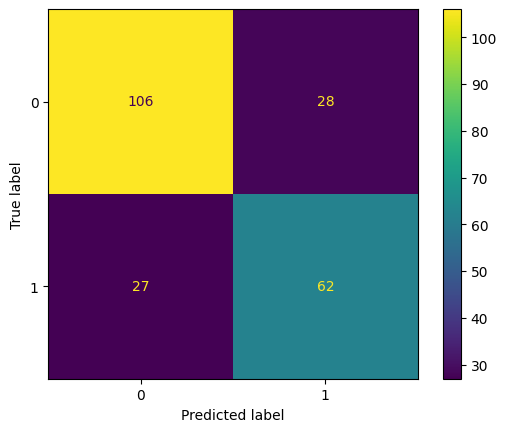

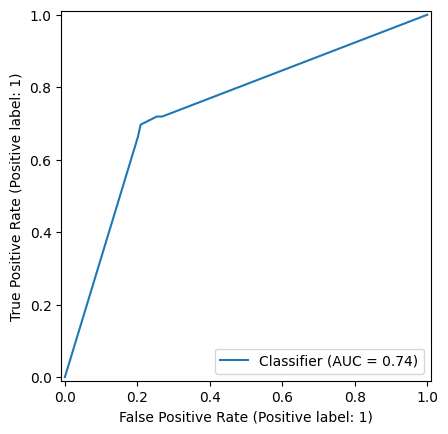

In [5]:
parameters = dict(
    num_method="mean",
    cat_method="frequent",
    sc_variables=["fare", "age"],
    min_samples_leaf=1,
    min_samples_split=2,
    max_depth=None,
    encoder=OneHotEncoder(),
    threshold=0.5,
)
pipe = make_pipeline(parameters)
make_evaluation(pipe, X_train, X_test, y_train, y_test)

Entrenamiento para Decision Tree y threshold = 0.5
Train Accuracy 0.8488023952095808
Test Accuracy 0.8071748878923767
Train Precision 0.8333333333333334
Test Precision 0.8194444444444444
Train Recall 0.7509881422924901
Test Recall 0.6629213483146067


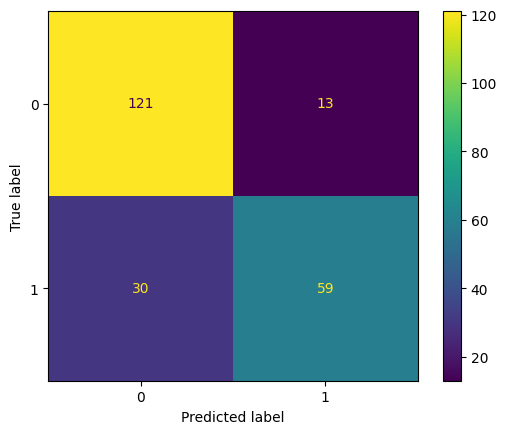

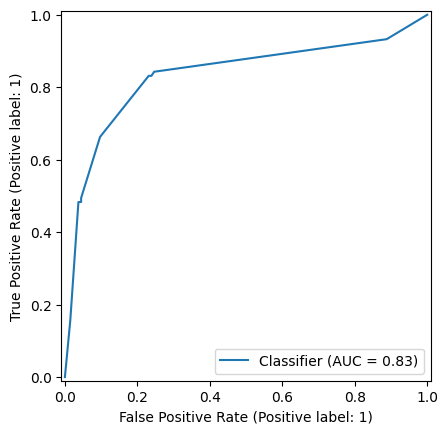

In [6]:
parameters = dict(
    num_method="mean",
    cat_method="frequent",
    sc_variables=["fare", "age"],
    min_samples_leaf=1,
    min_samples_split=2,
    max_depth=5,
    encoder=OneHotEncoder(),
    threshold=0.5,
)
pipe = make_pipeline(parameters)
make_evaluation(pipe, X_train, X_test, y_train, y_test)

Entrenamiento para Decision Tree y threshold = 0.2
Train Accuracy 0.8068862275449101
Test Accuracy 0.7892376681614349
Train Precision 0.6962025316455697
Test Precision 0.6944444444444444
Train Recall 0.8695652173913043
Test Recall 0.8426966292134831


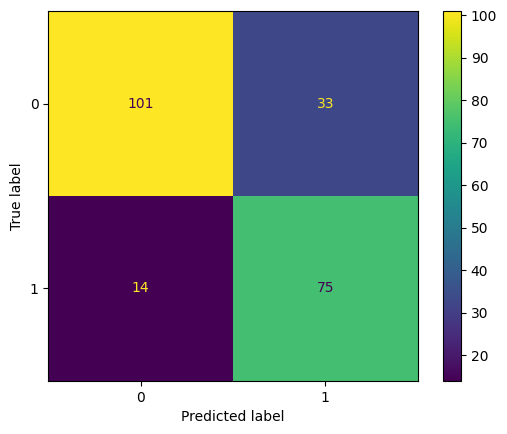

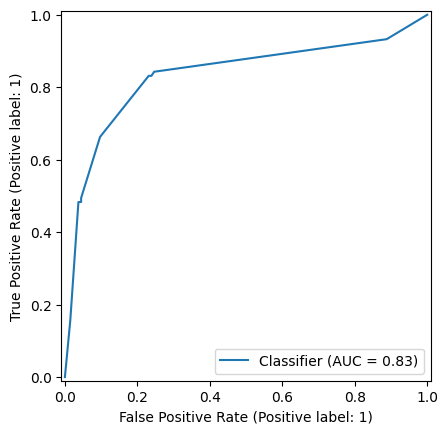

In [7]:
parameters = dict(
    num_method="mean",
    cat_method="frequent",
    sc_variables=["fare", "age"],
    min_samples_leaf=1,
    min_samples_split=2,
    max_depth=5,
    encoder=OneHotEncoder(),
    threshold=0.2,
)
pipe = make_pipeline(parameters)
make_evaluation(pipe, X_train, X_test, y_train, y_test)

Entrenamiento para Decision Tree y threshold = 0.9
Train Accuracy 0.8173652694610778
Test Accuracy 0.7713004484304933
Train Precision 0.9851851851851852
Test Precision 0.8958333333333334
Train Recall 0.525691699604743
Test Recall 0.48314606741573035


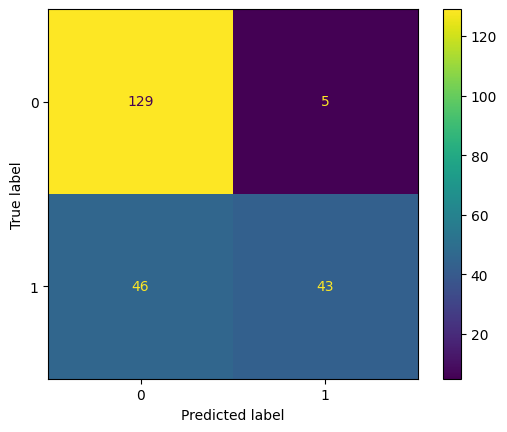

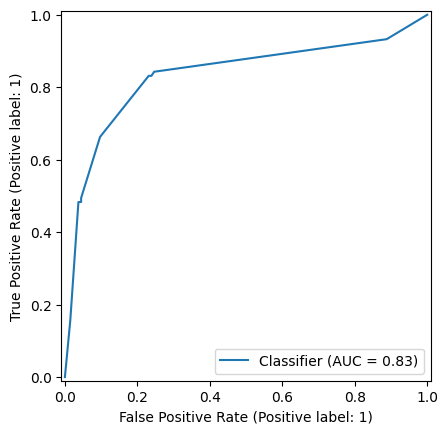

In [8]:
parameters = dict(
    num_method="mean",
    cat_method="frequent",
    sc_variables=["fare", "age"],
    min_samples_leaf=1,
    min_samples_split=2,
    max_depth=5,
    encoder=OneHotEncoder(),
    threshold=0.9,
)
pipe = make_pipeline(parameters)
make_evaluation(pipe, X_train, X_test, y_train, y_test)

Entrenamiento para Decision Tree y threshold = 0.2
Train Accuracy 0.6212574850299402
Test Accuracy 0.6143497757847534
Train Precision 0.5
Test Precision 0.50920245398773
Train Recall 0.924901185770751
Test Recall 0.9325842696629213


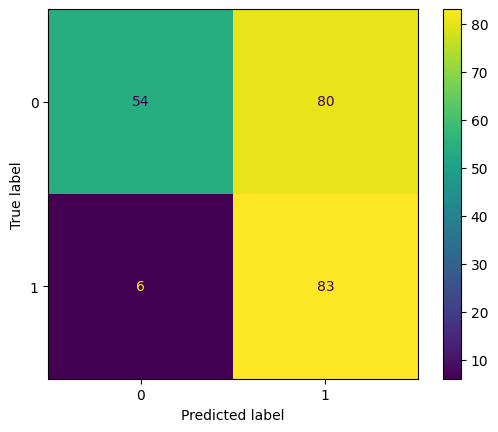

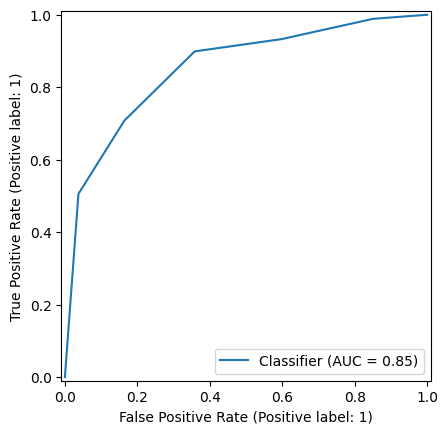

In [9]:
parameters = dict(
    num_method="mean",
    cat_method="frequent",
    sc_variables=["fare", "age"],
    min_samples_leaf=0.1,
    min_samples_split=2,
    max_depth=None,
    encoder=OneHotEncoder(),
    threshold=0.2,
)
pipe = make_pipeline(parameters)
make_evaluation(pipe, X_train, X_test, y_train, y_test)

Entrenamiento para Decision Tree y threshold = 0.5
Train Accuracy 0.8023952095808383
Test Accuracy 0.7757847533632287
Train Precision 0.9290780141843972
Test Precision 0.8679245283018868
Train Recall 0.5177865612648221
Test Recall 0.5168539325842697


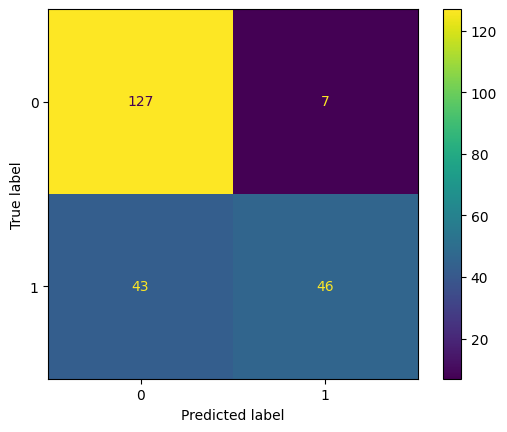

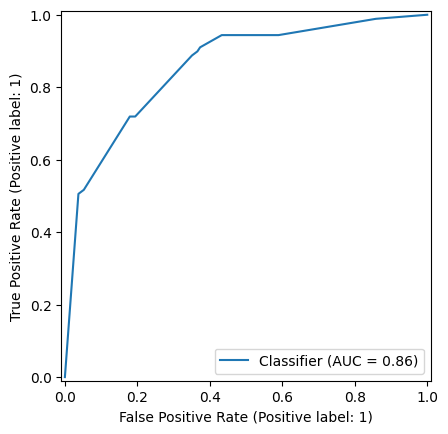

In [10]:
parameters = dict(
    num_method="mean",
    cat_method="frequent",
    sc_variables=["fare", "age"],
    min_samples_leaf=1,
    min_samples_split=0.2,
    max_depth=None,
    encoder=OneHotEncoder(),
    threshold=0.5,
)
pipe = make_pipeline(parameters)
make_evaluation(pipe, X_train, X_test, y_train, y_test)